In [2]:
%pylab inline

# import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import imageio


Populating the interactive namespace from numpy and matplotlib


In [3]:
globaletopo_img = imageio.imread('../Data/Resources/ETOPO1_Ice_c_geotiff.tif')

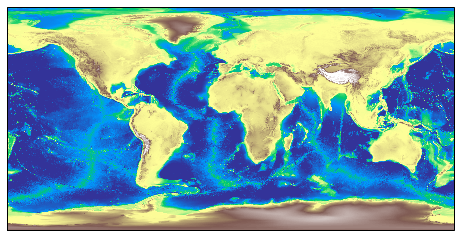

In [8]:
lon=180.0
global_extent     = [-180.0, 180.0, -90.0, 90.0]


projection1 = ccrs.Orthographic(central_longitude=lon, central_latitude=0.0, globe=None)
base_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 8), facecolor="none")
ax = plt.subplot(111, projection=base_projection)
ax.set_global()
ax.imshow(globaletopo_img, origin='upper', 
          transform=base_projection, 
          extent=global_extent, 
          cmap=matplotlib.cm.terrain, vmin=-5000, vmax=5000,
          zorder=0)

In [ ]:
global_extent     = [-180.0, 180.0, -90.0, 90.0]

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

movie = imageio.get_writer('./etopoimageH.mp4', fps=25)

for lon in np.linspace(0, 360, 180):
    
    print("Lon {}".format(lon))
    
    projection1 = ccrs.Orthographic(central_longitude=lon, central_latitude=0.0, globe=None)
    base_projection = ccrs.PlateCarree()

    fig = plt.figure(figsize=(8, 8), facecolor="none")
    canvas = FigureCanvasAgg(fig)
    
    ax = plt.subplot(111, projection=projection1)
    ax.set_global()

    ax.imshow(globaletopo_img, origin='upper', 
          transform=base_projection, 
          extent=global_extent, 
          cmap=matplotlib.cm.terrain, vmin=-5000, vmax=5000,
          zorder=0)

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()
    im = np.frombuffer(s, np.uint8).reshape((height, width, 4))
    movie.append_data(im)
    
    plt.close()


movie.close()

Lon 0.0
Lon 2.011173184357542
Lon 4.022346368715084
Lon 6.033519553072626
Lon 8.044692737430168
Lon 10.05586592178771
Lon 12.067039106145252
Lon 14.078212290502794
Lon 16.089385474860336
Lon 18.100558659217878
Lon 20.11173184357542
Lon 22.122905027932962
Lon 24.134078212290504
Lon 26.145251396648046
Lon 28.156424581005588
Lon 30.16759776536313
Lon 32.17877094972067
Lon 34.18994413407822
Lon 36.201117318435756
Lon 38.212290502793294
Lon 40.22346368715084
Lon 42.234636871508386
Lon 44.245810055865924
Lon 46.25698324022346
Lon 48.26815642458101
Lon 50.27932960893855
Lon 52.29050279329609
Lon 54.30167597765363
Lon 56.312849162011176
Lon 58.32402234636872
Lon 60.33519553072626
Lon 62.3463687150838
Lon 64.35754189944134
Lon 66.36871508379889
Lon 68.37988826815644
Lon 70.39106145251397
Lon 72.40223463687151
Lon 74.41340782122906
Lon 76.42458100558659
Lon 78.43575418994413
Lon 80.44692737430168
Lon 82.45810055865923
Lon 84.46927374301677
Lon 86.4804469273743
Lon 88.49162011173185
Lon 90.502793

In [10]:
!open etopoimageH.mp4